## .1 Opening the file

In [279]:
import pandas as pd
data = "C:\\Users\\sowky\\Downloads\\legal_text_classification.csv"
df = pd.read_csv(data)
df.head(20)

,case_id,case_outcome,case_title,case_text
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...
5,Case6,cited,GEC Marconi Systems Pty Ltd v BHP Information ...,I accept that the making of a rolled up offer ...
6,Case7,cited,John S Hayes &amp; Associates Pty Ltd v Kimber...,The preceding general principles inform the ex...
7,Case8,cited,Seven Network Limited v News Limited (2007) 24...,On the question of the level of unreasonablene...
8,Case9,applied,Australian Broadcasting Corporation v O'Neill ...,recent decision of the High Court in Australia...
9,Case10,followed,Hexal Australia Pty Ltd v Roche Therapeutics I...,Hexal Australia Pty Ltd v Roche Therapeutics I...


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24985 entries, 0 to 24984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   case_id       24985 non-null  object
 1   case_outcome  24985 non-null  object
 2   case_title    24985 non-null  object
 3   case_text     24809 non-null  object
dtypes: object(4)
memory usage: 780.9+ KB


## Removing stopwords

In [281]:
#import regex
import regex as re
#define tokenize
def tokenize(case_text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r':', '', text) # Remove :
    text = re.findall(r'[\w]*[a-z|A-Z][\w-]*', case_text)


In [282]:
#REMOVE STOP WORDS
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

{'do', 'd', "wasn't", 'ourselves', 'being', 'hasn', 'was', 't', 'couldn', "couldn't", "you'll", 'herself', 'can', 'just', 'his', 'any', 'below', 'above', "needn't", 'hadn', 'between', 'ours', 'or', 'wouldn', 'their', 'a', 'few', "you're", 'have', 'with', 'during', 'having', 'further', 'o', 'has', 'been', "should've", 'am', "wouldn't", "that'll", 'there', 'my', 'haven', 'while', "shan't", 'be', 'did', "isn't", 'will', "mustn't", 'down', 'until', 'they', 'through', 'it', 'ain', 'nor', 'before', 'than', 'our', 'too', 'because', 'itself', 'this', 'shouldn', "it's", 'you', 'needn', 'other', 'now', 'of', 'we', 'what', 'how', 'over', 'yours', 's', 'hers', 'more', 'why', 'by', 'that', 'didn', 'which', 'should', 'shan', 'doesn', 'at', 'she', 'no', 'these', 'him', "you've", "won't", 'isn', 'to', 'i', 'about', 'if', 'then', 'not', 'such', 'so', 'are', 'against', 'an', 'doing', 'don', 'again', 'her', 'ma', 'those', 'yourself', 'out', 'same', 'its', 'only', 'won', "she's", 'had', "don't", 'm', 'int

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sowky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [283]:
tokenize = df['case_text']

tokenize


0        Ordinarily that discretion will be exercised s...
1        The general principles governing the exercise ...
2        Ordinarily that discretion will be exercised s...
3        The general principles governing the exercise ...
4        The preceding general principles inform the ex...
                               ...                        
24980    That is not confined to persons who control th...
24981    Once the threshold prescribed by s 1335 is sat...
24982    Once the threshold prescribed by s 1335 is sat...
24983    Given the extent to which Deumer stands to gai...
24984    In my view, it is clear that the Court may do ...
Name: case_text, Length: 24985, dtype: object

## 2.Operations

In [284]:
df['length'] = df['case_text'].str.len()
df.describe()

,length
count,24809.000000
mean,2650.940385
std,6768.945893
min,95.000000
25%,841.000000
50%,1408.000000
75%,2533.000000
max,133561.000000


In [285]:
df.dtypes

case_id          object
case_outcome     object
case_title       object
case_text        object
length          float64
dtype: object

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24985 entries, 0 to 24984
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   case_id       24985 non-null  object 
 1   case_outcome  24985 non-null  object 
 2   case_title    24985 non-null  object 
 3   case_text     24809 non-null  object 
 4   length        24809 non-null  float64
dtypes: float64(1), object(4)
memory usage: 976.1+ KB


In [287]:
df.isna().sum()

case_id           0
case_outcome      0
case_title        0
case_text       176
length          176
dtype: int64

In [288]:
df[df['case_title'].str.contains('immigration')]
df

,case_id,case_outcome,case_title,case_text,length
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...,428.0
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...,974.0
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...,428.0
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...,974.0
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...,701.0
...,...,...,...,...,...
24980,Case25203,cited,Reches Pty Ltd v Tadiran Pty Ltd (1998) 85 FCR...,That is not confined to persons who control th...,926.0
24981,Case25204,cited,Sir Lindsay Parkinson &amp; Co Ltd v Triplan L...,Once the threshold prescribed by s 1335 is sat...,426.0
24982,Case25205,cited,Spiel v Commodity Brokers Australia Pty Ltd (I...,Once the threshold prescribed by s 1335 is sat...,426.0
24983,Case25206,distinguished,"Tullock Ltd v Walker (Unreported, Supreme Cour...",Given the extent to which Deumer stands to gai...,1163.0


## Plots

,case_id,case_outcome,case_title,case_text,length
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...,428.0
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...,974.0
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...,428.0
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...,974.0
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...,701.0
...,...,...,...,...,...
24980,Case25203,cited,Reches Pty Ltd v Tadiran Pty Ltd (1998) 85 FCR...,That is not confined to persons who control th...,926.0
24981,Case25204,cited,Sir Lindsay Parkinson &amp; Co Ltd v Triplan L...,Once the threshold prescribed by s 1335 is sat...,426.0
24982,Case25205,cited,Spiel v Commodity Brokers Australia Pty Ltd (I...,Once the threshold prescribed by s 1335 is sat...,426.0
24983,Case25206,distinguished,"Tullock Ltd v Walker (Unreported, Supreme Cour...",Given the extent to which Deumer stands to gai...,1163.0


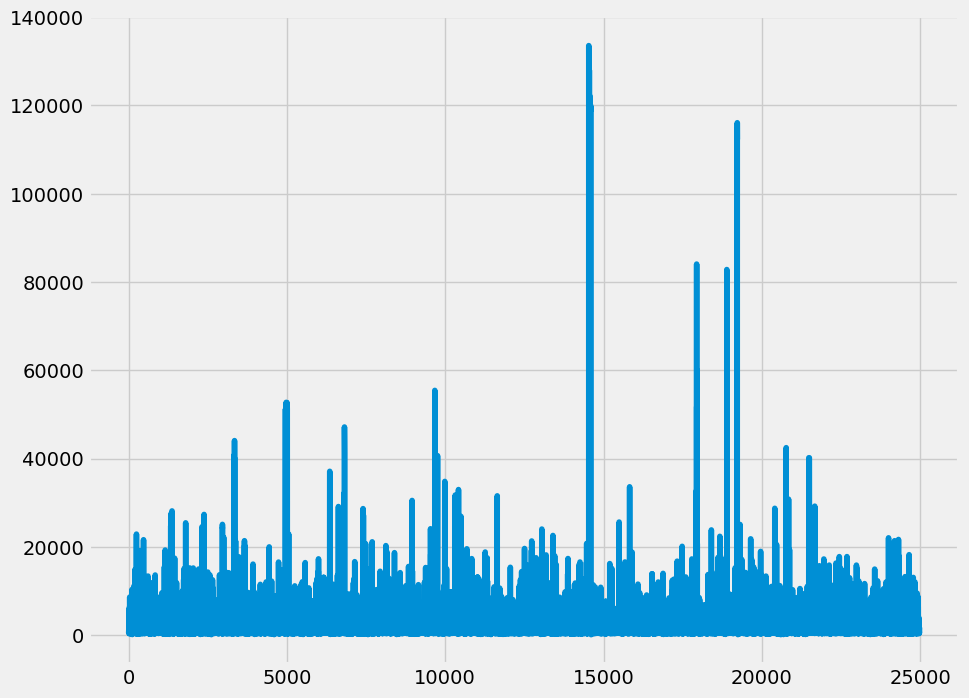

In [289]:
#chart
df['length'].plot()
df

,case_id,case_outcome,case_title,case_text,length
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...,428.0
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...,974.0
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...,428.0
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...,974.0
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...,701.0
...,...,...,...,...,...
24980,Case25203,cited,Reches Pty Ltd v Tadiran Pty Ltd (1998) 85 FCR...,That is not confined to persons who control th...,926.0
24981,Case25204,cited,Sir Lindsay Parkinson &amp; Co Ltd v Triplan L...,Once the threshold prescribed by s 1335 is sat...,426.0
24982,Case25205,cited,Spiel v Commodity Brokers Australia Pty Ltd (I...,Once the threshold prescribed by s 1335 is sat...,426.0
24983,Case25206,distinguished,"Tullock Ltd v Walker (Unreported, Supreme Cour...",Given the extent to which Deumer stands to gai...,1163.0


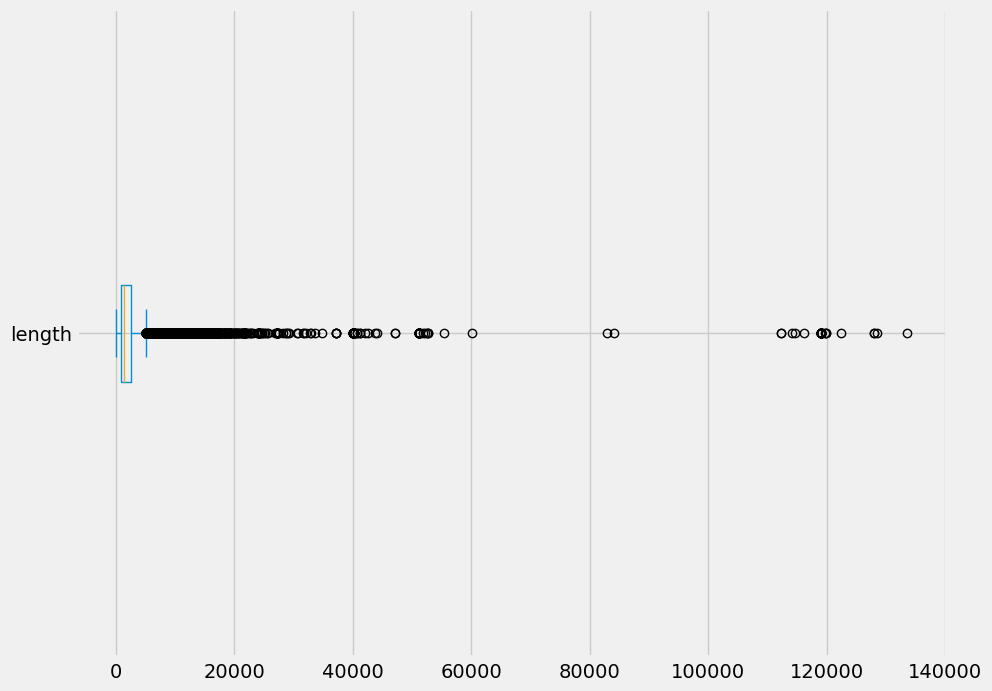

In [290]:
#Boxplot 
df['length'].plot(kind='box', vert=False)
df

,case_id,case_outcome,case_title,case_text,length
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...,428.0
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...,974.0
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...,428.0
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...,974.0
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...,701.0
...,...,...,...,...,...
24980,Case25203,cited,Reches Pty Ltd v Tadiran Pty Ltd (1998) 85 FCR...,That is not confined to persons who control th...,926.0
24981,Case25204,cited,Sir Lindsay Parkinson &amp; Co Ltd v Triplan L...,Once the threshold prescribed by s 1335 is sat...,426.0
24982,Case25205,cited,Spiel v Commodity Brokers Australia Pty Ltd (I...,Once the threshold prescribed by s 1335 is sat...,426.0
24983,Case25206,distinguished,"Tullock Ltd v Walker (Unreported, Supreme Cour...",Given the extent to which Deumer stands to gai...,1163.0


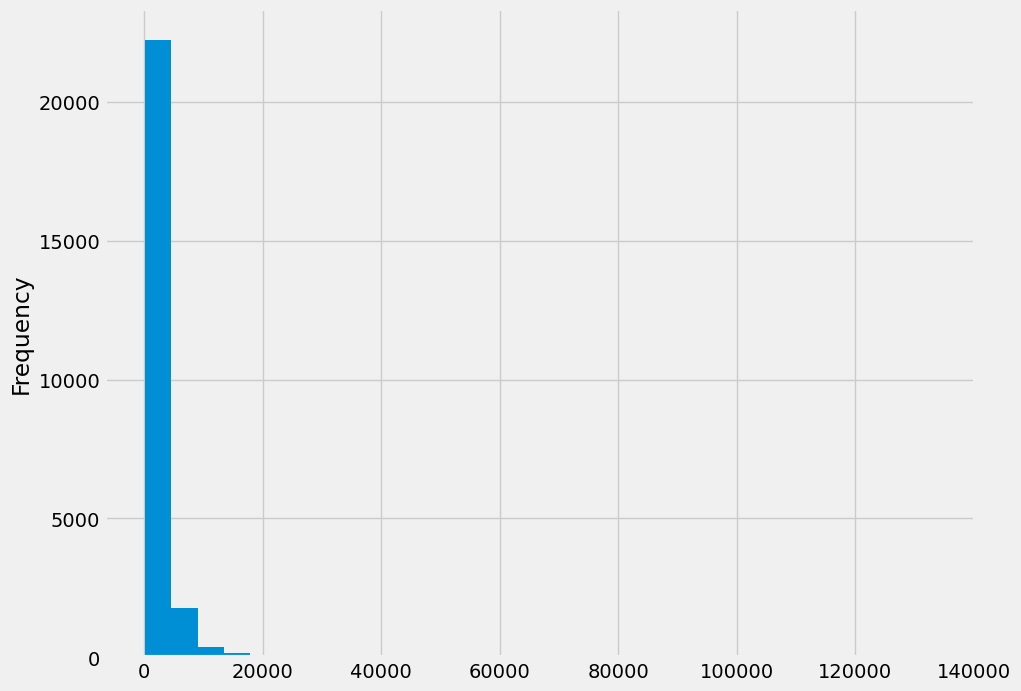

In [291]:
#Histogram
df['length'].plot(kind='hist', bins=30)
df

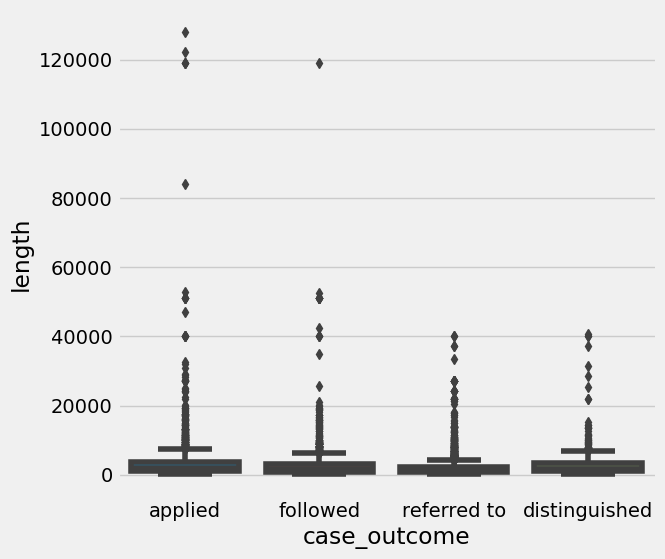

In [292]:
#bar plot
import seaborn as sns
where = df['case_outcome'].isin(['citied', 'applied', 'distinguished', 'referred to', 'followed'])
g = sns.catplot(data=df[where], x="case_outcome", y="length", kind='box')
g.fig.set_size_inches(8, 6) ###

## 3.Creating a pipeline

In [293]:

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [tokenize, remove_stop]


In [294]:
def prepare(case_text, pipeline):
    tokens = case_text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

# Example usage
pipeline = [tokenize, remove_stop] 


In [295]:
pipeline = [str.lower, tokenize, remove_stop]

In [296]:
def prepare(case_text, pipeline):
    tokens = case_text
    for fun in pipeline:
        tokens = fun(tokens)
        return tokens

In [296]:
def prepare(case_text, pipeline):
    tokens = case_text
    for fun in pipeline:
        tokens = fun(tokens)
        return tokens

## Frequency

In [297]:
from collections import Counter
counter = Counter()
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'tokens'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
tokens,


## 4. Regex

In [298]:
#import regex
import regex as re
#define tokenize
def tokenize(case_text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r':', '', text) # Remove :

## 5. Sentiment analysis

In [299]:
!pip install textblob

In [300]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [301]:
#Create a function to get the subjectivity
def getSubjectivity(case_text):
    return TextBlob(case_text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(case_text):
    return TextBlob(case_text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
df['Subjectivity'] = df['case_title'].apply(getSubjectivity)
df['Polarity'] = df['case_title'].apply(getPolarity)

#Now display data
df.head()

,case_id,case_outcome,case_title,case_text,length,Subjectivity,Polarity
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...,428.0,0.000000,0.000000
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...,974.0,0.433333,-0.166667
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...,428.0,0.000000,0.000000
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...,974.0,1.000000,0.500000
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...,701.0,0.000000,0.000000


In [302]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

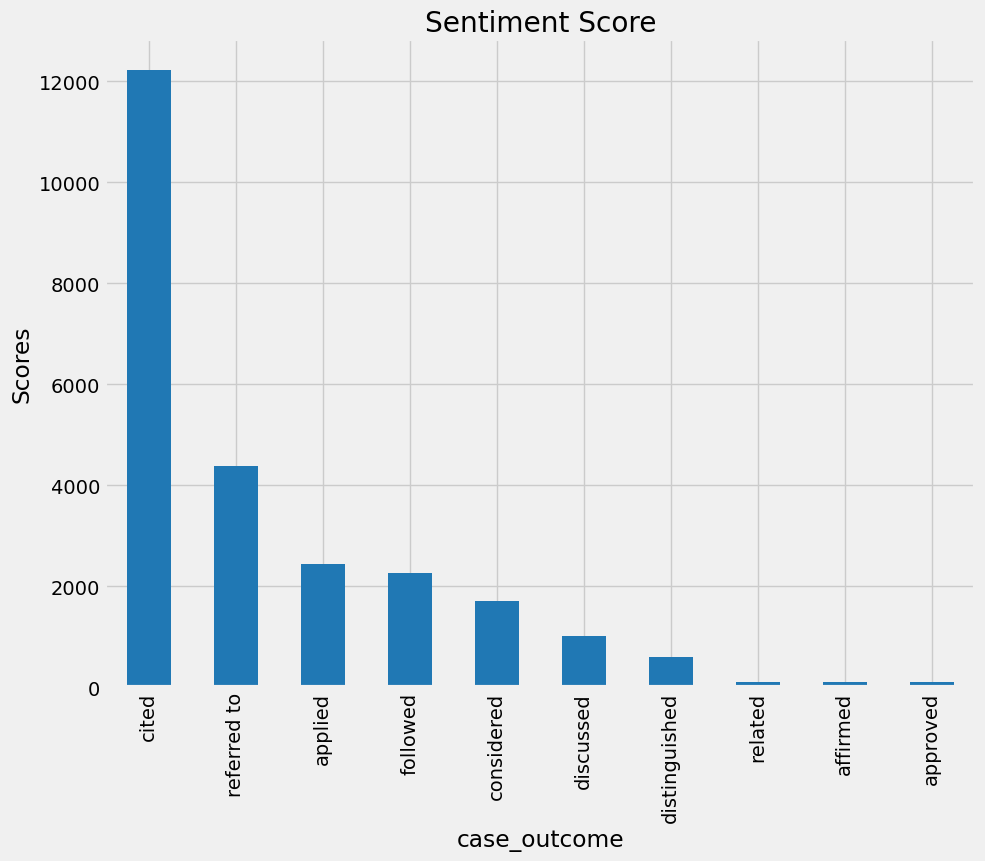

In [303]:
#Plot the values count of sentiment
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
df["Insight"] = df["Polarity"].apply(getInsight)
plt.title("Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
df["case_outcome"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

In [304]:
# Assuming df is your DataFrame and 'length' is the name of the column you want to drop
df.drop(columns=['length'])


,case_id,case_outcome,case_title,case_text,Subjectivity,Polarity,Insight
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...,0.000000,0.000000,Neutral
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...,0.433333,-0.166667,Negative
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...,0.000000,0.000000,Neutral
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...,1.000000,0.500000,Positive
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...
24980,Case25203,cited,Reches Pty Ltd v Tadiran Pty Ltd (1998) 85 FCR...,That is not confined to persons who control th...,0.000000,0.000000,Neutral
24981,Case25204,cited,Sir Lindsay Parkinson &amp; Co Ltd v Triplan L...,Once the threshold prescribed by s 1335 is sat...,0.000000,0.000000,Neutral
24982,Case25205,cited,Spiel v Commodity Brokers Australia Pty Ltd (I...,Once the threshold prescribed by s 1335 is sat...,0.000000,0.000000,Neutral
24983,Case25206,distinguished,"Tullock Ltd v Walker (Unreported, Supreme Cour...",Given the extent to which Deumer stands to gai...,0.454545,0.136364,Positive


In [305]:
df.drop(columns=['length'], inplace=True)

In [306]:
def prepare(case_text, pipeline):
    tokens = case_text
    for fun in pipeline:
        tokens = fun(tokens)
        return tokens

In [307]:
#running pipeline
df['tokens'] = df['case_text'].apply(prepare,pipeline=pipeline)

TypeError: descriptor 'lower' for 'str' objects doesn't apply to a 'float' object

In [ ]:
df

In [ ]:
df['num_tokens'] = df['tokens'].map(len)
df.tail()